# Zillow Property Value Prediction Project

## Overview:
  - This project will based off the Zillow dataset. We will be using the acquired Regression skills to attempt to predict house prices. Zillow has many key data entries that can help in our prefiction models. Some of these include, but not limited to, the total square feet, property value, tax value, bedroom count, and bathroom count. This predictions will be based off single family properties.

## Project Goals:
  - Find correlations between variables
  - Find drivers for our model
  - Find the best model for our predictions

## Project Agenda
  - Acquire
  - Prepare
  - Explore
  - Modeling
  - Conclusion

---

In [2]:
# These are all the Imports that will be used for the project
import env
import acquire as a
import prepare as p
import functions as f
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_squared_error, explained_variance_score

from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
scaler= MinMaxScaler()

---

# Acquire
  - Here we acquire our Zillow data from the Codeup SQL database
  - Then we used pandas to read in the SQL query and save the data to our notebook

In [3]:
df= a.get_zillow()

In [4]:
df.head(10)

,Unnamed: 0,yearbuilt,taxvaluedollarcnt,taxamount,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,fips
0,0,NaN,27516.0,NaN,0.0,0.0,NaN,6037.0
1,1,NaN,10.0,NaN,0.0,0.0,NaN,6037.0
2,2,NaN,10.0,NaN,0.0,0.0,NaN,6037.0
3,3,NaN,2108.0,174.21,0.0,0.0,NaN,6037.0
4,4,2005.0,296425.0,6941.39,4.0,2.0,3633.0,6037.0
5,5,NaN,124.0,NaN,0.0,0.0,NaN,6037.0
6,6,2011.0,847770.0,10244.94,3.0,4.0,1620.0,6037.0
7,7,1926.0,646760.0,7924.68,3.0,2.0,2077.0,6037.0
8,8,NaN,6730242.0,80348.13,0.0,0.0,NaN,6037.0
9,9,NaN,15532.0,248.89,0.0,0.0,NaN,6037.0


----

# Prepare
  - Here we prepare the acquired data to make it easier to use, cleaner, and better for modeling
    - Rename columns for better use/ understanding
    - Drop columns
    - Drop Null values
    - Split data multiple times

In [5]:
# Here we use a function to prepare the data and then split it into train, val, test
train, val, test= p.prep_zillow(df)

Train shape:
(1053985, 7)
Validate shape:
(451708, 7)
Test shape:
(376424, 7)


In [6]:
# Use .head() to show the newly cleaned data
train.head()

,year_built,property_value,tax_amount,bedrooms,bathrooms,sqr_feet,county
2010611,1965.0,507733.0,5728.14,3.0,2.0,1923.0,orange
1937230,2003.0,551948.0,6295.84,4.0,3.0,2420.0,ventura
170197,1964.0,657428.0,7338.40,5.0,2.0,1982.0,orange
407560,1969.0,271635.0,3150.84,4.0,2.0,1738.0,orange
980494,1963.0,69288.0,759.52,3.0,2.0,1561.0,ventura


----

# Exploration
   - Here we use the newly cleaned data to explore the unknown data and find out its secrets
     - Graph data to get a general overview of the data
     - Use statistical testing to answer our questions correctly
     - Find major drivers 

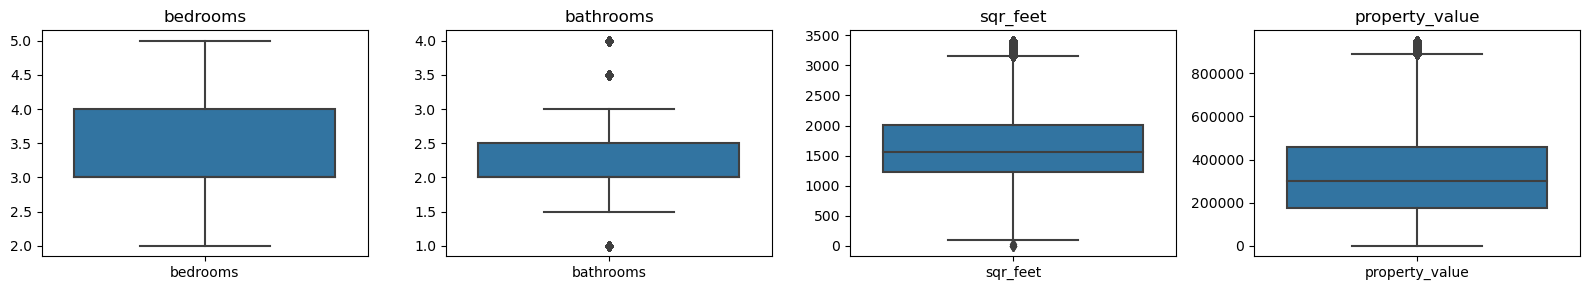

In [6]:
# plot the continuous variables from the train dataset
f.plot_box(train)

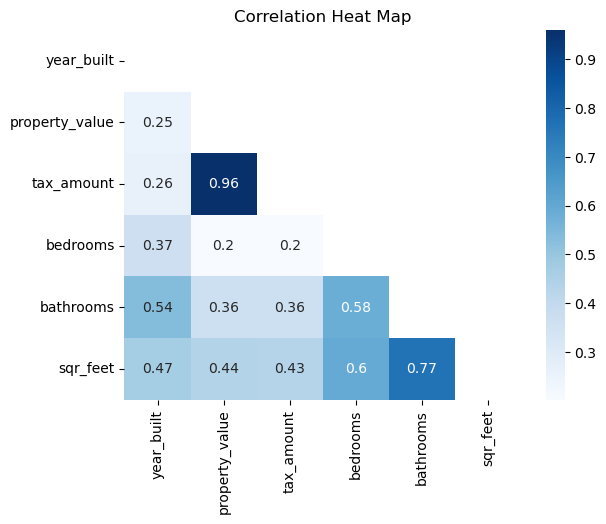

In [20]:
# creating a correlation matrix
corr=train.corr()

# plot heatmap
f.plot_heatmap(corr)

----

In [9]:
# HTML code used to hide code cells
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Hide/Show: Raw Code"></form>''')

## Statistical Testing

$H_{o}$: There is no relationship between total Square Feet and Property Value

$H_{a}$: There is a relationship between total Square Feet and Property Value

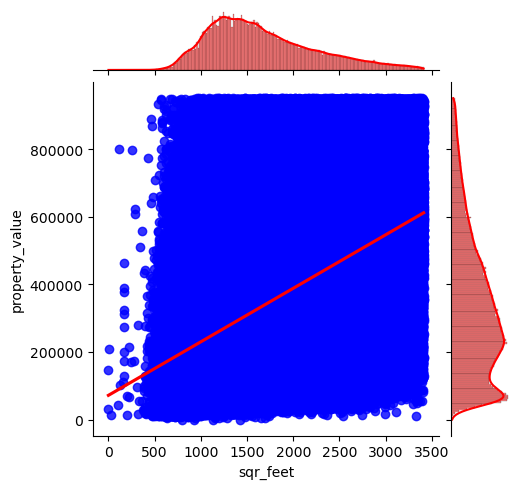

In [10]:
# plot graph
f.sqr_property(train)

In [11]:
# return statistical results
r, p_value = pearsonr(train.sqr_feet, train.property_value)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.43717585880902654
P-value: 0.0


- ### Looking at the graph and the results of the stats test, we are able to Reject the Null Hypothesis. Meaning that there is a correlation between Square Feet and Property Value

----

$H_{o}$: There is no relationship between the Year Built and Property Value

$H_{a}$: There is a relationship between the Year Built and Property Value

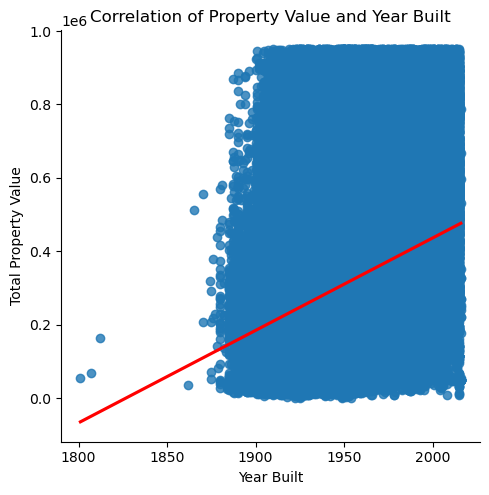

In [12]:
# functions to plot Property Value and the Year Built
def year_property():
    sns.lmplot(data= train, x= 'year_built', y= 'property_value', scatter=True, line_kws={"color": "red"})
    plt.title('Correlation of Property Value and Year Built')
    plt.xlabel('Year Built')
    plt.ylabel('Total Property Value')
    plt.show()
# use the function
year_property()

In [13]:
# return statistical results
r, p_value = pearsonr(train.year_built, train.property_value)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.2519029220078279
P-value: 0.0


- ### The graph and statistical test both show that there is a correlation between the Property Value and the Year Built. With this information, we are able to reject the Null hypothesis.

----

$H_{o}$: There is no correlation between Bedrooms and Property Value

$H_{a}$: There is a correlation between Bedroom and Property Value

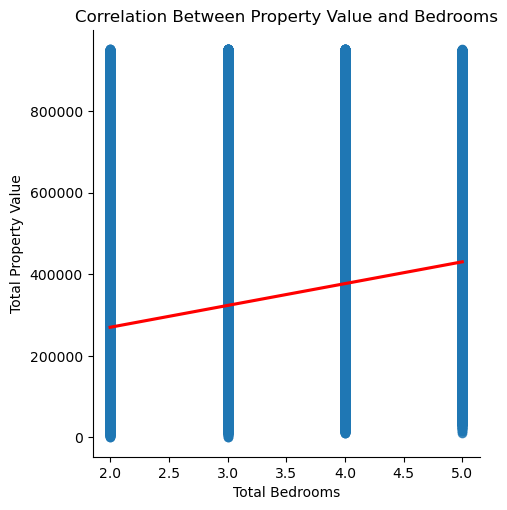

In [14]:
# functions to plot Property Value and Bedrooms
def bed_property():
    sns.lmplot(data= train, x= 'bedrooms', y= 'property_value', scatter=True, line_kws={"color": "red"})
    plt.title('Correlation Between Property Value and Bedrooms')
    plt.xlabel('Total Bedrooms')
    plt.ylabel('Total Property Value')
# use the function    
bed_property()

In [15]:
# return statistical test results 
r, p_value = pearsonr(train.bedrooms, train.property_value)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.20230172660177168
P-value: 0.0


- ### With the newly found information from the graph and the statistical testing, we are able to reject the Null hypothesis.

$H_{o}$: There is no relationship between Bathrooms and Property Value

$H_{a}$: There is a relationship between Bathrooms and Property Value

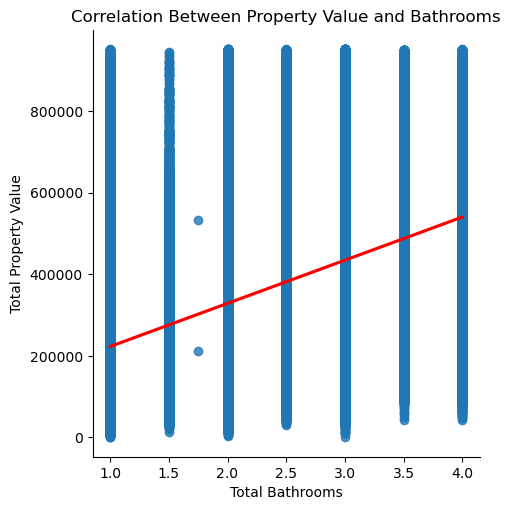

In [16]:
# function for plotting Property Value and Bathrooms
def bath_property():  
    sns.lmplot(data= train, x= 'bathrooms', y= 'property_value',scatter=True, line_kws={"color": "red"}) 
    plt.title('Correlation Between Property Value and Bathrooms')
    plt.xlabel('Total Bathrooms')
    plt.ylabel('Total Property Value')
    plt.show()
# use function   
bath_property()

In [17]:
# return statistical test results
r, p_value = pearsonr(train.bathrooms, train.property_value)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.36380211936690715
P-value: 0.0


- ### Due to the results of the statistical testing, we are able to see that there is a correlation between Property Value and Bathrooms. This leads us to reject the Null hypothesis.

<div class="alert alert-info">
    <header>
    <h2>Exploration Takeaways</h2>
    </header>
    <dl> We can see that each question answered resulted in there being a correlation between the specific variable, and Property Value. I decided to use them all in the modeling phase because of the results. However, county(originally fips) was not used since it showed 0 correlation in the heatmap graph.
        <dd>
    </dl>
</div>

---

## Modeling

In [25]:
# HTML code to hide code cells
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Hide/Show: Raw Code"></form>''')

In [18]:
# dropping the county column before scaling
train.drop(columns= ['county'], inplace= True)
val.drop(columns= ['county'], inplace= True)
test.drop(columns= ['county'], inplace= True)

In [19]:
#split data into various sets
X_train, y_train, X_val, y_val, X_test, y_test= f.six_split(train, val, test)

In [20]:
# scale the data
X_train_scaled, X_val_scaled, X_test_scaled= f.mmscale(X_train, X_val, X_test)

In [21]:
# Here we take a look at the results
X_train_scaled.head()

,year_built,tax_amount,bedrooms,bathrooms,sqr_feet
2010611,0.762791,0.139118,0.333333,0.333333,0.563802
1937230,0.939535,0.152951,0.666667,0.666667,0.709592
170197,0.758140,0.178355,1.000000,0.333333,0.581109
407560,0.781395,0.076319,0.666667,0.333333,0.509534
980494,0.753488,0.018051,0.333333,0.333333,0.457612


In [22]:
# getting the baseline
f.calc_baseline(y_train, y_val)

RMSE using Mean
Train/In-Sample:  207061.12 
Validate/Out-of-Sample:  207046.3
RMSE using Median
Train/In-Sample:  210000.49 
Validate/Out-of-Sample:  210013.04


In [23]:
# creates model and saves data into a dataframe
f.take_the_L(X_train_scaled, y_train,X_val_scaled, y_val)

,model,rmse_train,r2_train,rmse_validate,r2_validate
0,baseline_mean,207061.124433,0.000000,207046.304415,0.000000
1,Linear Regression,57508.636163,0.922862,59018.700688,0.918746
2,"LarsLasso, alpha 4",57666.022986,0.922439,59140.048244,0.918412
3,Tweedie Regressor,57508.636163,0.922862,59018.700698,0.918746


<div class="alert alert-info">
    <header>
    <h2>Model Takeaways:</h2>
    </header>
    <dl>
        <dd> Based on the results of the various models that we have used, <strong>Tweedie Regressor</strong> was shown to
            be the best preforming model.
    </dl>
</div>

Conclusion
Our test data ran similar to our train and validate
- RMSE was similar to the other sets
Recommendations
- When predicting homes, I recommend focusing on focusing on the number of bedrooms and bathrooms they have. There was a significant difference in homes with two bathrooms and three/three or less bedrooms.
- Overall finished square feet does show a moderate correlation and can be used to make predictions, but should not be relied on.
Next Steps
- If I had more time, location would be interesting to analyze. Does location have any relationship with other features?
- I would also try to find another feature with a stronger correlation to property value than finished square feet
- I would combine two of the explore questions and test the mean of homes with 2 bathrooms and 3 bedrooms against the overall mean

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 3:</h2>
    </header>
    <dl>
        <dt> The Linear Regression Model preformed the best our of the other various models</dt>
        <dt>Recommendations:</dt>
        <dd>- We should set our focus towards houses with a higher number of bedrooms/bathrooms</dd>
        <dt> Next Steps:</dt>
        <dd>- Try to get data about how up to data the houses are.</dd>
        <dd>- Explore how large of an impact the county area has on the property value</dd>
    </dl>
</div>

In [34]:
train.property_value.median()

300000.0

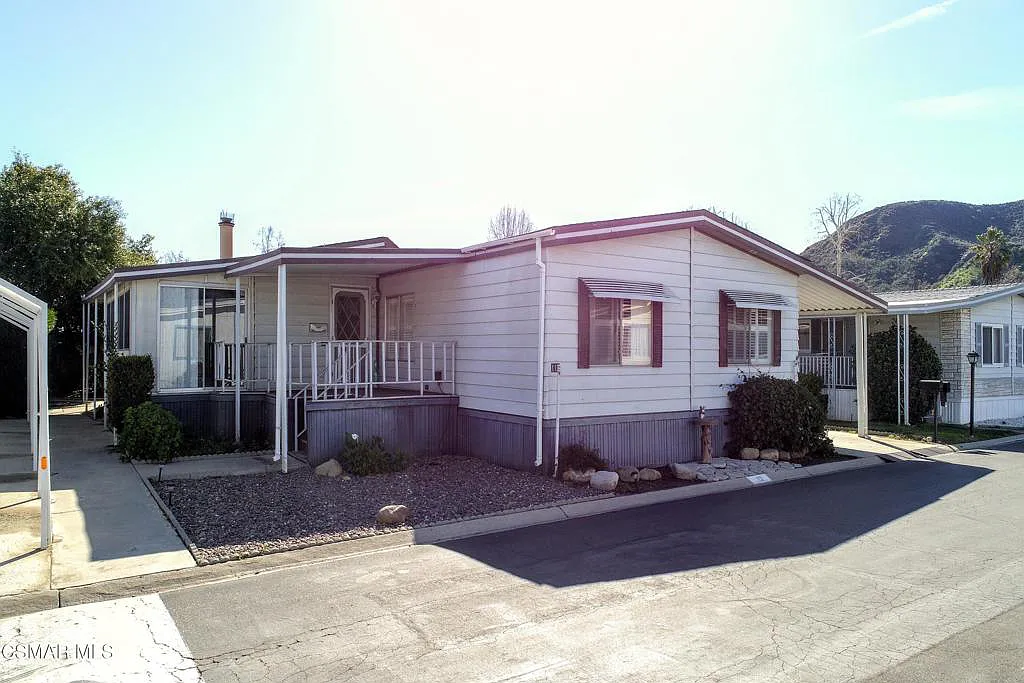, 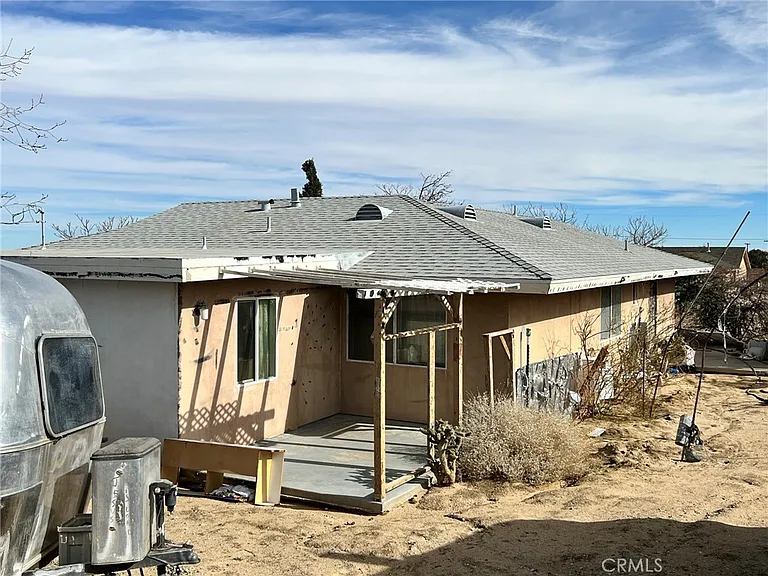, 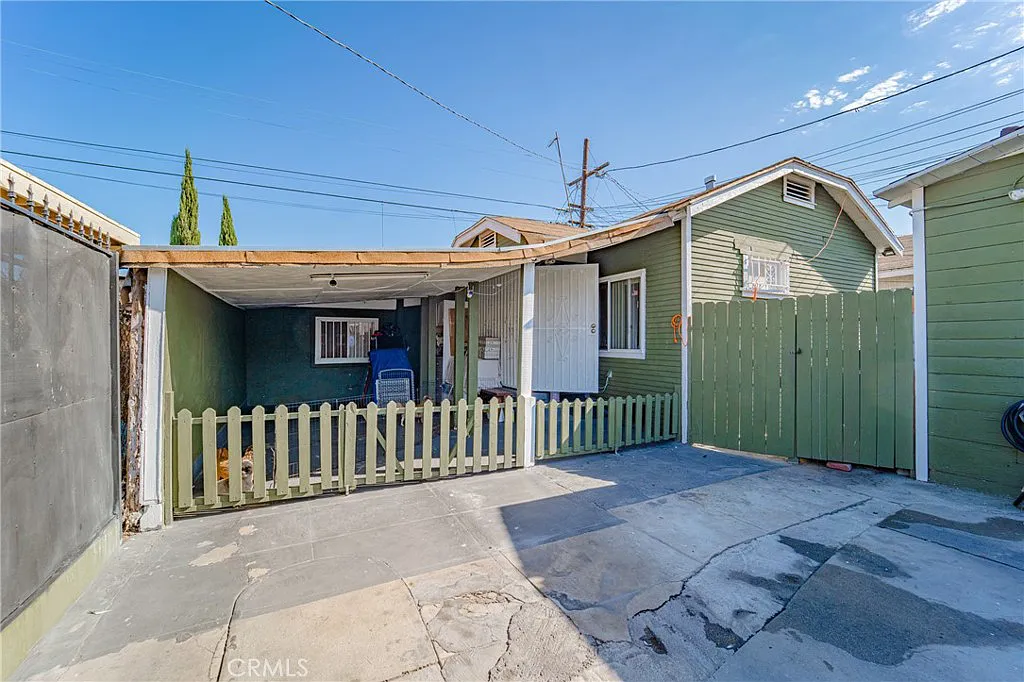